In [219]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import time

In [220]:
# partice properties and constants
scale = 1e-6
mass = 9.109e-31
hbar = 6.626e-34
charge = 1

In [221]:
def potential(v):
    
    x = 64
    y = 64
    k = 1e16
    for i in range(N):
        for j in range(N):
            r = ((i-x)**2+(j-y)**2)**.5 * scale
            v[i][j] = 1/2 * k * r**2
        
    return v

In [222]:
def lanczos(v0,m,q):
    #Writing Lanczos Algorithm
    #Initial Iteration
    w = []
    beta = [0]
    v = [v0]
    wp = []
    alpha = []
    w0p = Hx(v0, q, phi)
    wp.append(w0p)
    alpha0 = np.conj(w0p.T) @ v0
    alpha.append(alpha0)
    w0 = w0p - alpha0 * v0
    w.append(w0)
    #Repeated Iteration
    for j in range(1,m):
        betaj = np.linalg.norm(w[j-1])
        beta.append(betaj)
        vj = w[j-1]/beta[j]
        v.append(vj)
        wjp = Hx(v[j], q, phi)
        wp.append(wjp)
        alphaj = np.conj(wp[j].T) @ v[j]
        alpha.append(alphaj)
        wj = wp[j] - alpha[j] * v[j] - beta[j] * v[j-1]
        w.append(wj)   
        
    v = np.array(v)
    V = v.T
    Teigenvals, Teigenvecs = eigh_tridiagonal(alpha,beta[1:]) #tridiagonal matrix with alphas on main diagonal and betas on adjacent ones
    groundstate_eigenval = Teigenvals[0]
    groundstate_eigenvec = Teigenvecs[:,0]
    print(groundstate_eigenval)
    return V @ groundstate_eigenvec   
    
    
    

In [223]:
N = 128
xy1 = np.mgrid[0:N,0:N]
xy = xy1.reshape(2,-1)
xp = np.roll(xy1,-1,axis=1).reshape(2,-1)
xm = np.roll(xy1,1,axis=1).reshape(2,-1)
yp = np.roll(xy1,-1,axis=2).reshape(2,-1)
ym = np.roll(xy1,1,axis=2).reshape(2,-1)

def Hx(x,q,phi):
   #Create discrete version of Hamiltonian operator
    x = x.reshape(int(np.sqrt(len(x))),-1)
    ax = np.zeros(x.shape)

    #Use discrete schrodinger equation
    ax[xy[0,:],xy[1,:]] = -hbar/(2*mass*scale*scale)*(-4*x[xy[0,:],xy[1,:]] + x[xp[0,:],xp[1,:]] + x[xm[0,:],xm[1,:]] +  x[yp[0,:],yp[1,:]] + x[ym[0,:],ym[1,:]])+q*phi[xy[0,:],xy[1,:]]*x[xy[0,:],xy[1,:]] 
    #reset boundary
    ax[0,:] = 0
    ax[:,0] = 0
    ax[N-1,:] = 0
    ax[:,N-1] = 0

    return ax.flatten()

    

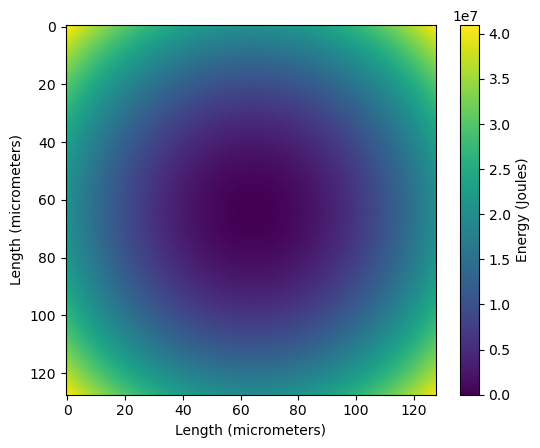

In [224]:
#Creating potential
phi = np.ones((N,N))
phi = potential(phi)
#Creating grid
plt.style.use('default')
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
               
Z = charge * phi[X][Y]
fig, ax = plt.subplots()
#Plot Potential
plt.imshow(Z)
cbar = plt.colorbar()
cbar.set_label("Energy (Joules)")
plt.xlabel("Length (micrometers)")
plt.ylabel("Length (micrometers)")
plt.show()


In [225]:
#Create starting v0
v0 = np.ones((N,N))
#v0 = potential(v0)

for i in range(N):
    for j in range(N):
        if(i == 0 or i == N-1 or j == 0 or j == N-1):
            v0[i][j] = 0
v0 = v0/np.linalg.norm(v0)
v0 = v0.flatten()

In [226]:
iterations = 100

t1 = time.time()
for i in range(iterations):
    result = lanczos(v0,10,charge)
    v0 = result/np.linalg.norm(result)
t2 = time.time()
print("Time taken: " + str(round(t2-t1,3)) + " seconds.")

8913654.555248458
5653146.397194128
4273879.374095375
3564770.884151993
3184736.2841711696
2973120.436781267
2853954.764604175
2786254.397184203
2747694.9409540873
2725705.390568103
2713154.8020417024
2705990.965299289
2701899.137542118
2699561.811108249
2698225.853593715
2697462.153620091
2697025.347576693
2696775.4760808195
2696632.474705493
2696550.624462156
2696503.7582819094
2696476.920492662
2696461.5472550886
2696452.740344355
2696447.693830832
2696444.801868653
2696443.1442418634
2696442.1940539116
2696441.6492845626
2696441.336934751
2696441.157816102
2696441.0550939343
2696440.996175398
2696440.9623795054
2696440.9429913443
2696440.9318679757
2696440.9254853795
2696440.9218227514
2696440.919720645
2696440.9185140356
2696440.917821314
2696440.9174235472
2696440.9171950854
2696440.9170638286
2696440.9169883872
2696440.9169450058
2696440.91692004
2696440.9169056723
2696440.9168973826
2696440.9168925956
2696440.916889827
2696440.9168882268
2696440.9168872875
2696440.9168867455
26

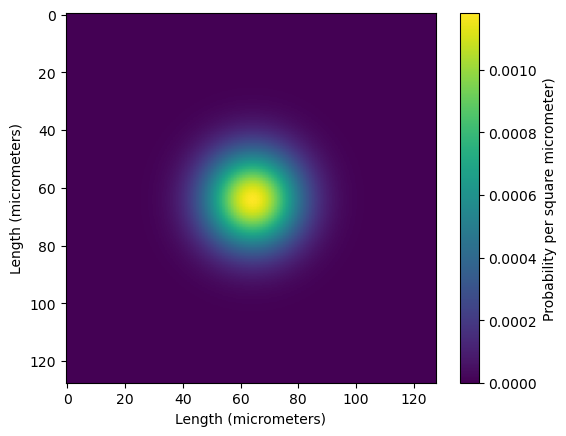

In [227]:
wavefunction = np.reshape(v0, (N,N))
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
                   
wavefunction = wavefunction[X][Y]
fig, ax = plt.subplots()
#plot wavefunction squared to give probability plot
probability = wavefunction**2
norm = np.sum(probability)
probability = probability / norm
plt.imshow(probability)
cbar = plt.colorbar()
cbar.set_label("Probability per square micrometer)")
plt.xlabel("Length (micrometers)")
plt.ylabel("Length (micrometers)")
plt.show()